In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,r2_score,mean_squared_error

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.shape

(200000, 9)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(199999, 9)

In [9]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
df=df.drop(['Unnamed: 0', 'key'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [12]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [13]:
# need to convey that pickup_datetime has datetime format of values 
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
# Date time need to segregate into hours, day, date, month, day of week 
df=df.assign(hour =df.pickup_datetime.dt.hour,
         day=df.pickup_datetime.dt.day,
         month=df.pickup_datetime.dt.month,
         year=df.pickup_datetime.dt.year,
         dayofweek=df.pickup_datetime.dt.dayofweek)

In [15]:
df.drop('pickup_datetime',axis=1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5,2015,2


fare_amount             AxesSubplot(0.125,0.772143;0.352273x0.107857)
pickup_longitude     AxesSubplot(0.547727,0.772143;0.352273x0.107857)
pickup_latitude         AxesSubplot(0.125,0.642714;0.352273x0.107857)
dropoff_longitude    AxesSubplot(0.547727,0.642714;0.352273x0.107857)
dropoff_latitude        AxesSubplot(0.125,0.513286;0.352273x0.107857)
passenger_count      AxesSubplot(0.547727,0.513286;0.352273x0.107857)
hour                    AxesSubplot(0.125,0.383857;0.352273x0.107857)
day                  AxesSubplot(0.547727,0.383857;0.352273x0.107857)
month                   AxesSubplot(0.125,0.254429;0.352273x0.107857)
year                 AxesSubplot(0.547727,0.254429;0.352273x0.107857)
dayofweek                  AxesSubplot(0.125,0.125;0.352273x0.107857)
dtype: object

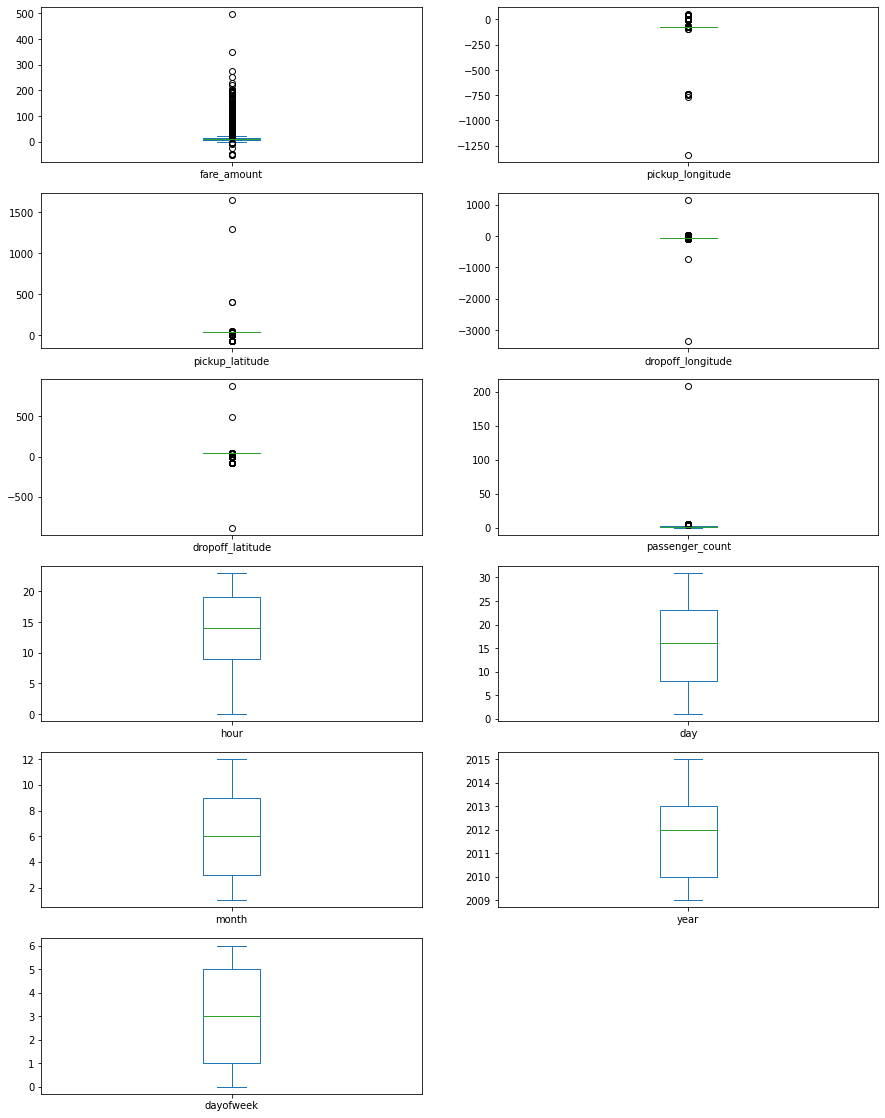

In [16]:
# outliers are the data points which differ way more than other
df.plot(kind="box",subplots=True, layout=(6,2),figsize=(15,20))

In [17]:
# After finding out there are outliers in our dataset 
# we will use interquartile range to remove the outliers
# read about the interquartile range

In [18]:
def remove_outlier(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_whisker = q1 - 1.5 * IQR
    upper_whisker = q3 + 1.5 * IQR
    data = data[(data[col] >= lower_whisker) & (data[col] <= upper_whisker)]
    return data

def treat_outlier(data, col_list):
    for c in col_list:
        data = remove_outlier(data, c)
    return data


In [19]:
df=treat_outlier(df,df)

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

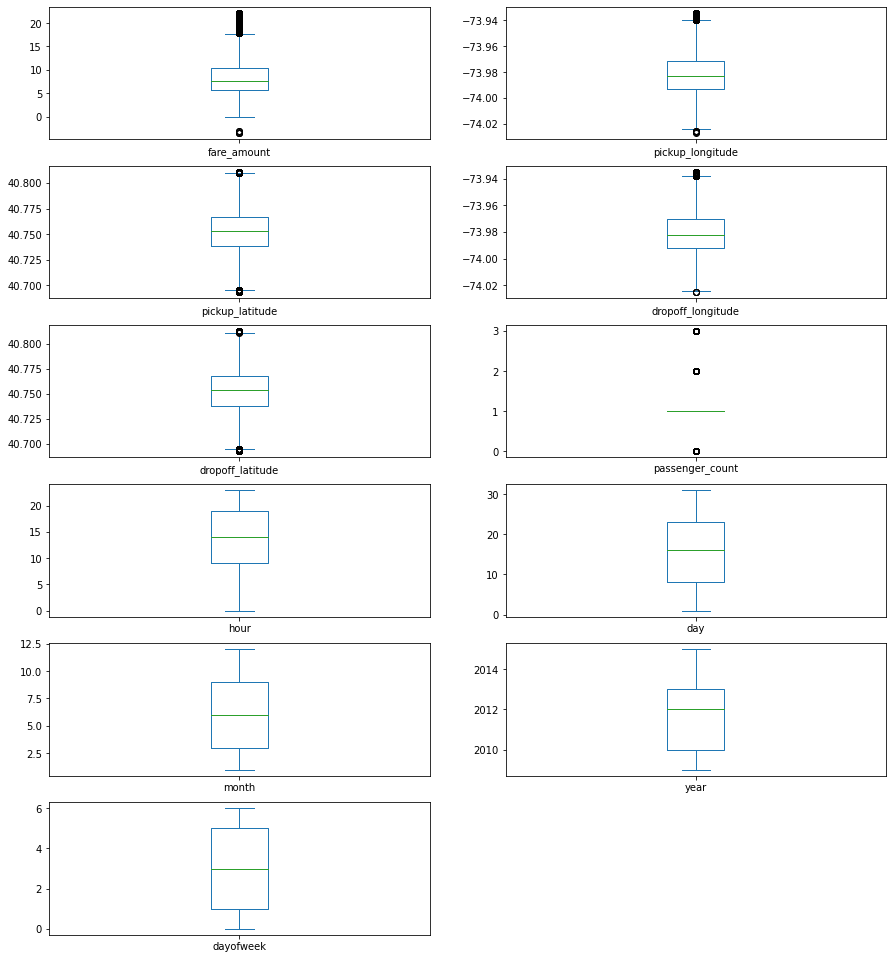

In [20]:
# df.plot(kind='box',subplots=True,layout=(6,2),figsize=(15,20))
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [21]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,148075.000000,148075.000000,148075.000000,148075.000000,148075.000000,148075.000000,148075.000000,148075.000000,148075.000000,148075.000000,148075.000000
mean,8.636420,-73.981887,40.752722,-73.981003,40.753039,1.261057,13.639129,15.695918,6.252176,2011.710856,3.018329
std,3.874731,0.016040,0.021134,0.016726,0.022264,0.549571,6.347119,8.683513,3.447295,1.857665,1.935352
min,-3.500000,-74.027303,40.692925,-74.025485,40.692082,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,5.700000,-73.992805,40.738176,-73.992247,40.738170,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,7.700000,-73.982852,40.753480,-73.982008,40.754160,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,10.500000,-73.971488,40.766684,-73.970437,40.767448,1.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,22.200000,-73.934102,40.810923,-73.934753,40.812950,3.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [22]:
# pip install haversine 
# haversine is required to calculate the distance between current and destination point
# haversine can calculate the distance between two points same as google maps

In [23]:
import haversine as hs

travel_dist = []
n = len(df['pickup_longitude'])
for pos in range(n):
    row=df.iloc[pos]  # iloc selects the column
    long1 = row['pickup_longitude']
    lati1 = row['pickup_latitude']
    long2 = row['dropoff_longitude']
    lati2 = row['dropoff_latitude']
    
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

df['dist_travel'] = travel_dist


In [24]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683325
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457593
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036384
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661686
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2,12,2,2011,5,0.000000


In [25]:
# uber doesnt travel more than 130km so minimize the distance
df= df.loc[(df.dist_travel >= 1) | (df.dist_travel <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (148075, 13)


In [26]:
corr=df.corr()

<AxesSubplot:>

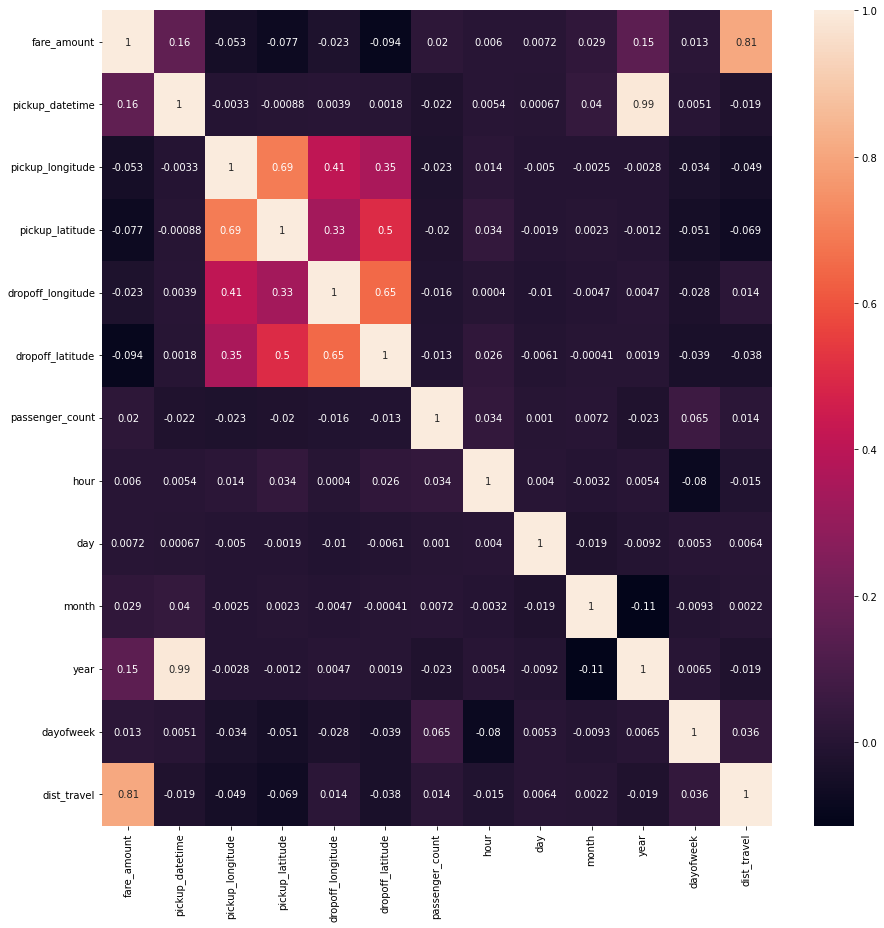

In [27]:
fig,axis=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [28]:
# divide the data set into target and feature values

In [29]:
x = df[['passenger_count','hour','day','month','year','dayofweek','dist_travel']]

In [30]:
y= df['fare_amount']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [32]:
# Linear Regression
regression = LinearRegression()

In [33]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
prediction = regression.predict(X_test) #To predict the target values

In [35]:
r2_score(y_test,prediction)

0.6870101372479217

In [36]:
MSE = mean_squared_error(y_test,prediction)
print(MSE)

4.722846133727889


In [37]:
RMSE = np.sqrt(MSE)
print(RMSE)

2.173211019143767


In [38]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [39]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
y_pred = rf.predict(X_test)

In [41]:
r2_score(y_test,y_pred)

0.7185972222372785

In [42]:
MSE_Random=mean_squared_error(y_test,y_pred)
print(MSE_Random)

4.246214268063008


In [43]:
RMSE_Random=np.sqrt(MSE_Random)
print(RMSE_Random)

2.0606344333876905
